In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Loading images
img1 = cv2.imread(r"C:\Users\manju\Downloads\A1.jpg")
img2 = cv2.imread(r"C:\Users\manju\Downloads\A2.jpg")

# Converting images to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Detecting corners using Harris Corner Detector
corner1 = cv2.cornerHarris(gray1, 2, 3, 0.04)
corner2 = cv2.cornerHarris(gray2, 2, 3, 0.04)

# Thresholding corners
corner1 = cv2.threshold(corner1, 0.01 * corner1.max(), 255, 0)
corner2 = cv2.threshold(corner2, 0.01 * corner2.max(), 255, 0)

# Finding centroids of corners
corner1 = np.uint8(corner1[1])
corner2 = np.uint8(corner2[1])
_, labels1, stats1, centroids1 = cv2.connectedComponentsWithStats(corner1)
_, labels2, stats2, centroids2 = cv2.connectedComponentsWithStats(corner2)

# Creating keypoints from centroids
keypoints1 = [cv2.KeyPoint(x, y, 3) for x, y in centroids1[1:]]
keypoints2 = [cv2.KeyPoint(x, y, 3) for x, y in centroids2[1:]]

# Initializing ORB detector with custom parameters
orb = cv2.ORB_create(nfeatures=500, scaleFactor=1.2, nlevels=8)

# Computing descriptors
kp1, des1 = orb.compute(gray1, keypoints1)
kp2, des2 = orb.compute(gray2, keypoints2)

# Creating a BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Matching descriptors
matches = bf.match(des1, des2)

# Sorting matches based on distance
matches = sorted(matches, key=lambda x: x.distance)

# Applying Lowe's ratio test
good_matches = []
for m in matches:
    if m.distance < 2 * matches[0].distance:
        good_matches.append(m)

# Drawing good matches

img_matches = cv2.drawMatches(img1, kp1, img2, kp2, good_matches[:18], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

#img_matches = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None)

(-0.5, 201.5, 287.5, -0.5)

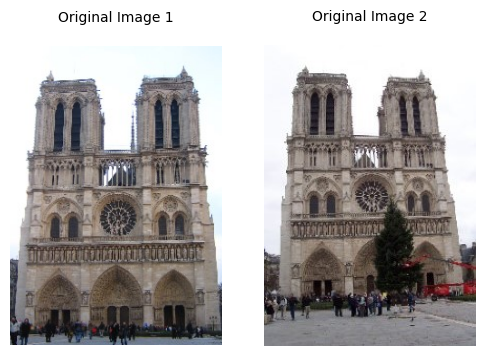

In [ ]:
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

fig,ax =  plt.subplots(1,2,figsize=(6, 6))

ax[0].imshow(img1_rgb)
ax[1].imshow(img2_rgb)
ax[0].set_title('Original Image 1\n', fontsize=10)
ax[1].set_title('Original Image 2\n', fontsize=10)
ax[0].axis('off')
ax[1].axis('off')

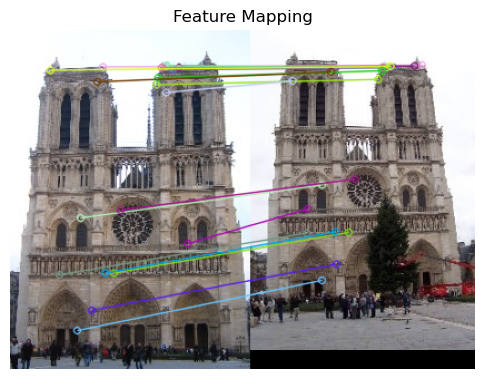

In [ ]:
matched_rgb = cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6, 6))
plt.imshow(matched_rgb)
plt.title('Feature Mapping')
plt.axis('off')
plt.show()